<img src="https://s3.amazonaws.com/datascienceheroes.com/EDV/360_banner_python.png" width="400px">

# Escuela de Datos Vivos
## LAB P.F.4.1: Modelo de clasificación
Creado por Pablo Casas | https://escueladedatosvivos.ai    

Resuelto por Pablo Sotomayor

---

## Ejercicios

Crear un clasificador de SPAM, basadose en una tabla pre-procesada. 

1) Separar TR/TS. 

2) Crear un random forest, u otro modelo, ¿se animan? 

3) Calcular curva ROC

4) Al revés del lab, calcular la matriz de confusión con punto de corte de 0.5, y con el punto que devuelva `discrimination_threshold`

5) Comparar ambas matrices de confusión, cual tiene mejor tasa de True Positives?



## Solución

In [216]:
# Librerías que vamos a utilizar

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling import status
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier.threshold import discrimination_threshold

warnings.filterwarnings('ignore')
%matplotlib inline

1) Carga de datos

In [14]:
data = pd.read_csv('../data/spam_data.csv')

print(f"Cantidad de registros: {data.shape[0]}")
print(f"Cantidad de variables: {data.shape[1]}")

Cantidad de registros: 4600
Cantidad de variables: 59


Inspeccionamos los datos elegiendo una muestra al azar

In [15]:
data.sample(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
1954,1954,0.42,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.000,0.000,0.000,0.151,0.0,0.0,1.533,9,69,0
2326,2326,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.000,0.664,0.000,0.000,0.0,0.0,3.157,11,60,0
97,97,0.00,0.0,0.0,0.0,0.00,0.6,0.00,0.0,0.0,...,0.207,0.518,0.414,0.310,0.0,0.0,4.897,17,191,1
2843,2843,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.000,0.227,0.227,0.000,0.0,0.0,4.043,28,186,0
1441,1441,0.00,0.0,0.0,0.0,0.97,0.0,0.97,0.0,0.0,...,0.000,0.000,0.000,0.834,0.0,0.0,3.052,68,116,1


Vemos que la columna "Unnamed: 0" no da información, pues es el índice del dato. Eliminamos ese atributo

In [16]:
data = data.drop("Unnamed: 0", axis=1)

Revisamos el estado de los datos

In [18]:
status(data).sort_values(by=["type", "unique"], ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
56,capital_run_length_total,0,0.0,0,0.000000,919,int64
55,capital_run_length_longest,0,0.0,0,0.000000,271,int64
57,is_spam,0,0.0,2788,0.606087,2,int64
54,capital_run_length_average,0,0.0,0,0.000000,2160,float64
51,char_freq_!,0,0.0,2343,0.509348,963,float64
49,char_freq_(,0,0.0,1885,0.409783,641,float64
18,word_freq_you,0,0.0,1374,0.298696,575,float64
52,char_freq_$,0,0.0,3200,0.695652,504,float64
20,word_freq_your,0,0.0,2178,0.473478,401,float64
24,word_freq_hp,0,0.0,3510,0.763043,395,float64


Se verifica que los datos han sido pre-procesados adecuadamente.

Separación entre datos de TR y TS

Todas las variables son numéricas, por lo que podemos usar el método de clasificación RandomForest sin hacer one-code enconding.

In [20]:
x_data = data.drop('is_spam', axis=1)
y_data = data['is_spam']

x_tr, x_ts, y_tr, y_ts = train_test_split(x_data, y_data, test_size=0.3, random_state=100)

2) Creación de un modelo predictivo random forest

In [108]:
rf = RandomForestClassifier(     
    n_estimators=19,
    max_depth=6, 
    min_samples_leaf=40,
    random_state=99)

Entrenamos al modelo

In [109]:
rf.fit(x_tr, y_tr)

RandomForestClassifier(max_depth=6, min_samples_leaf=40, n_estimators=19,
                       random_state=99)

Probabilidades calculadas con el modelo para los datos de entrenamiento

In [146]:
pred_probs=rf.predict_proba(x_tr)
pred_probs

array([[0.86614836, 0.13385164],
       [0.86521901, 0.13478099],
       [0.9021946 , 0.0978054 ],
       ...,
       [0.90253628, 0.09746372],
       [0.40094105, 0.59905895],
       [0.93735487, 0.06264513]])

La primera columna corresponde a la prob de clase 0, la segunda columna a la prob de clase 1. Nuestro vector de interés es el caso de obtener la clas e1 (es decir, resultado positivo).

In [147]:
y_prob_tr=pred_probs[:,1]
y_prob_tr

array([0.13385164, 0.13478099, 0.0978054 , ..., 0.09746372, 0.59905895,
       0.06264513])

Graficamos la matriz de confusión. La función plot_confusion_matrix de sklearn asume 0.5 como punto de corte para las probabilidades.

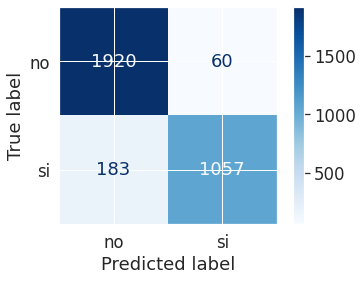

In [152]:
sns.set(font_scale=1.5) 

plot_confusion_matrix(rf, x_tr, y_tr,
                      display_labels=['no','si'],
                      cmap='Blues')

Este grafico nos indica lo siguiente:
- Verdaderos negativos (TN): 1920
- Falsos negativos (FN): 183
- Verdaderos positivos (TP): 1057
- Falsos positivos (FP): 60

Podemos también obtener una matriz de confusión con los valores normalizados.

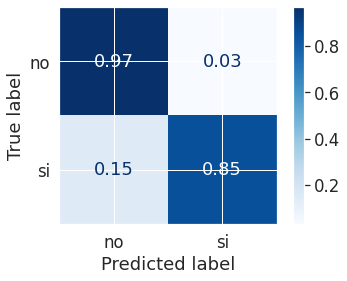

In [175]:
sns.set(font_scale=1.5) 

plot_confusion_matrix(rf, x_tr, y_tr,
                      display_labels=['no','si'],
                      cmap='Blues',
                      normalize='true')

Este gráfico nos indica lo siguiente:
- Del total de valores que son realmente negativos, el modelo predice bien el 97% de los casos y mal el 3% de los casos restantes.
- Del total de valores que son realmente positivos, el modelo predice bien el 85% de los casos y mal el 15% de los casos restantes.

También podemos normalizar sobre las predicciones, así tenemos una medida de la confianza en las predicciones de cada clase.

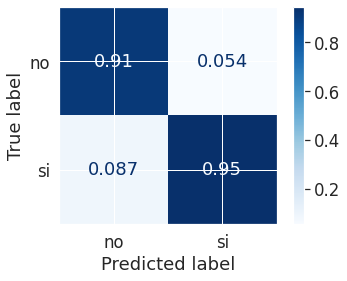

In [178]:
sns.set(font_scale=1.5) 

plot_confusion_matrix(rf, x_tr, y_tr,
                      display_labels=['no','si'],
                      cmap='Blues',
                      normalize='pred')

Este gráfico nos indica lo siguiente:
- Del total de valores que el modelo predice como negativos, el 91% eran verdaderamente negativos y el 9% están mal clasificados.
- Del total de valores que el modelo predice como positivos, el 95% eran verdaderamente positivos y el 5% están mal clasificados.

Revisamos el valor del punto de corte para la clasificación de los datos

In [162]:
print(f"Valor medio de las probabilidades predichas para el conjunto de entrenamiento = {y_prob_tr.mean()}")

Valor medio de las probabilidades predichas para el conjunto de entrenamiento = 0.3836781365875951


Establecemos un vector de "nuevas probabilidades" (más precisamente, nuevas clasificaciones), a partir del nuevo punto de corte

In [185]:
y_pred_tr_2 = np.where(y_prob_tr>0.27, 1, 0)

Calculamos la matriz de confusión con el nuevo punto de corte

In [186]:
conf_mat_2 = pd.crosstab(
    index=y_tr,
    columns=y_prob_tr_2,
    rownames=['Actual'],
    colnames=['Pred'],
    normalize="index")
conf_mat_2

Pred,0,1
Actual,,
0,0.837374,0.162626
1,0.045161,0.954839


La matriz de arriba está normalizada por los valores verdaderos de los datos. Podemos obtener también la misma matriz normalizada por los valores que predice el modelo.

In [187]:
conf_mat_2 = pd.crosstab(
    index=y_tr,
    columns=y_prob_tr_2,
    rownames=['Actual'],
    colnames=['Pred'],
    normalize="columns")
conf_mat_2

Pred,0,1
Actual,,
0,0.967328,0.213811
1,0.032672,0.786189


Comparamos los resultados obtenidos. Primero obtenemos la clase predicha por el modelo (para el punto de corte 0.5)

In [188]:
y_tr_pred = rf.predict(x_tr)

<ipython-input-210-58ed5d6614d6>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


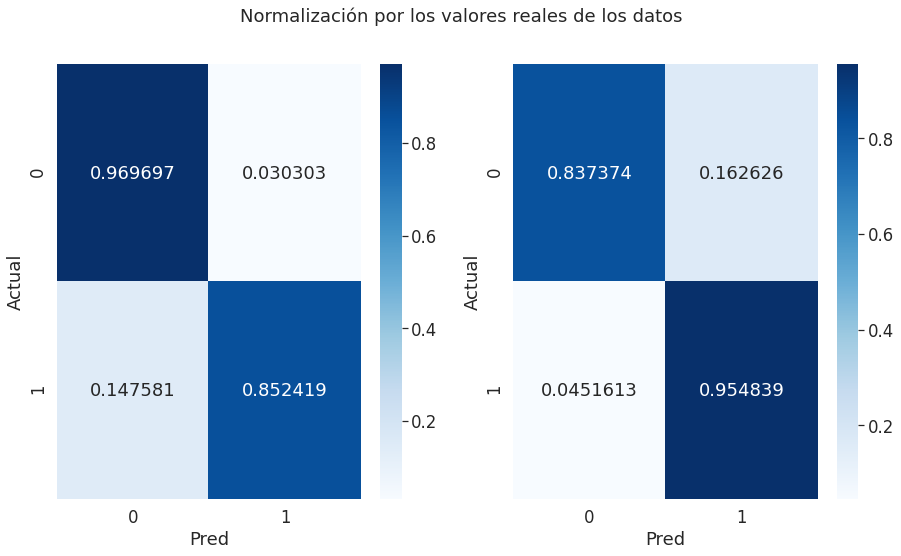

In [210]:
sns.set(font_scale=1.5)

fig, ax =plt.subplots(1,2, figsize=(15,8))


conf_mat1 = pd.crosstab(index=y_tr,
                        columns=y_tr_pred,
                        rownames=['Actual'], 
                        colnames=['Pred'], 
                        normalize='index')

conf_mat2 = pd.crosstab(index=y_tr,
                        columns=y_pred_tr_2,
                        rownames=['Actual'],
                        colnames=['Pred'],
                        normalize="index")

fig.suptitle("Normalización por los valores reales de los datos", fontsize=18)

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

fig.show(warn=False)

- Vemos que al bajar el punto de corte de 0.5 a 0.38 el porcentaje de casos que clasifica bien el modelo sube de 85% a 95%, esto se debe a que para los valores que el modelo clasifica como 1 ahora entran más casos que anteriormente eran equitados como 0, subiendo así el porcentaje de casos bien clasificados.

- En contraste, el porcentaje de casos negativos bien clasificados baja de 97% a 84%. Esto se debe a que ahora el modelo clasifica como 0 menos casos que antes, pues varios de esos casos tenían una probabilidad entre 0.38 y 0.5 de ser 1, y ahora son clasificados efectivamente como 1.

<ipython-input-213-5a61964809ba>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


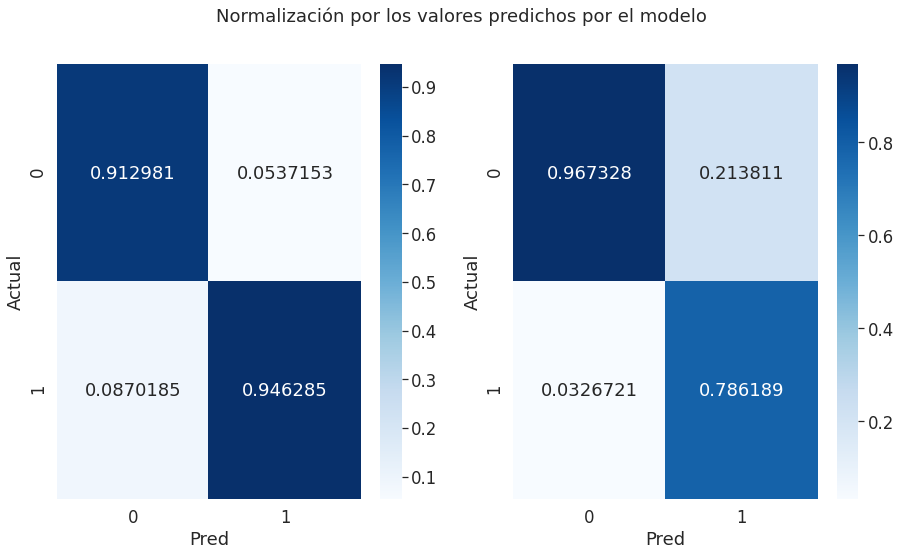

In [213]:
sns.set(font_scale=1.5)

fig, ax =plt.subplots(1,2, figsize=(15,8))


conf_mat1 = pd.crosstab(index=y_tr,
                        columns=y_tr_pred,
                        rownames=['Actual'], 
                        colnames=['Pred'], 
                        normalize="columns")

conf_mat2 = pd.crosstab(index=y_tr,
                        columns=y_pred_tr_2,
                        rownames=['Actual'],
                        colnames=['Pred'],
                        normalize="columns")

fig.suptitle("Normalización por los valores predichos por el modelo", fontsize=18)

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

fig.show(warn=False)

- Inicialmente, de todos los casos que el modelo predice como 1, el 95% de los casos estaban bien clasificados, y el 5% de los casos mal clasificados. Al bajar el punto de corte se agregan muchos casos nuevos que el modelo predice como 1 pero que en su mayoría son 0, por lo que baja la calidad de predicción del modelo.

- En contraste, ahora son menos casos clasificados como 0, pero esos casos es más seguro que efectivamente lo sean, por lo que los casos que el modelo predice correctamente como negativos aumenta de 91% a 97%.

Analizamos ahora el valor más óptimo para los puntos de corte

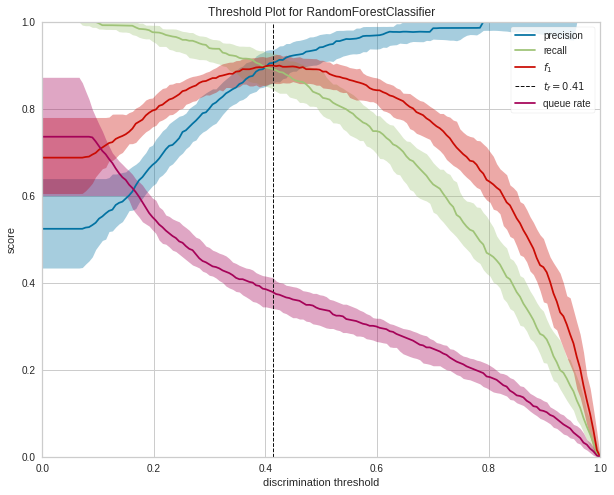

In [224]:
plt.figure(figsize=(10,8))
dis_res=discrimination_threshold(rf, x_tr, y_tr)
plt.show()

Así, al tener en cuenta las distintas métricas, el valor de punto de corte óptimo hallado es 0.41

3) Graficamos la curva ROC

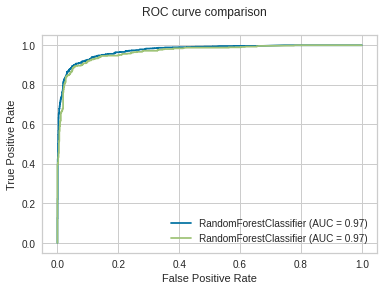

In [228]:
tr_disp = plot_roc_curve(rf, x_tr, y_tr)
ts_disp = plot_roc_curve(rf, x_ts, y_ts, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")
plt.show()

Podemos ver que hay un buen acuerdo entre el rendimiento con los datos de TR y los datos de TS. Además el modelo predice bien.